In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
import pandas as pd

# Load dataset (Example)
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")

# Check for missing values
print(df.isnull().sum())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [26]:
df = pd.get_dummies(df, drop_first=True)



In [27]:
print(df.info())  # Summary of dataset (data types, non-null values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   float64
 1   bmi               1337 non-null   float64
 2   children          1337 non-null   float64
 3   charges           1337 non-null   float64
 4   sex_male          1337 non-null   float64
 5   smoker_yes        1337 non-null   float64
 6   region_northwest  1337 non-null   float64
 7   region_southeast  1337 non-null   float64
 8   region_southwest  1337 non-null   float64
dtypes: float64(9)
memory usage: 94.1 KB
None


In [28]:
print(df.describe())

               age          bmi     children      charges     sex_male  \
count  1337.000000  1337.000000  1337.000000  1337.000000  1337.000000   
mean      0.461351     0.395573     0.219147     0.194055     0.504862   
std       0.305312     0.164123     0.241114     0.193306     0.500163   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.195652     0.277912     0.000000     0.057854     0.000000   
50%       0.456522     0.388485     0.200000     0.131915     1.000000   
75%       0.717391     0.504170     0.400000     0.247984     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        smoker_yes  region_northwest  region_southeast  region_southwest  
count  1337.000000       1337.000000       1337.000000       1337.000000  
mean      0.204936          0.242334          0.272251          0.243082  
std       0.403806          0.428655          0.445285          0.429104  
min       0.000000          0.000

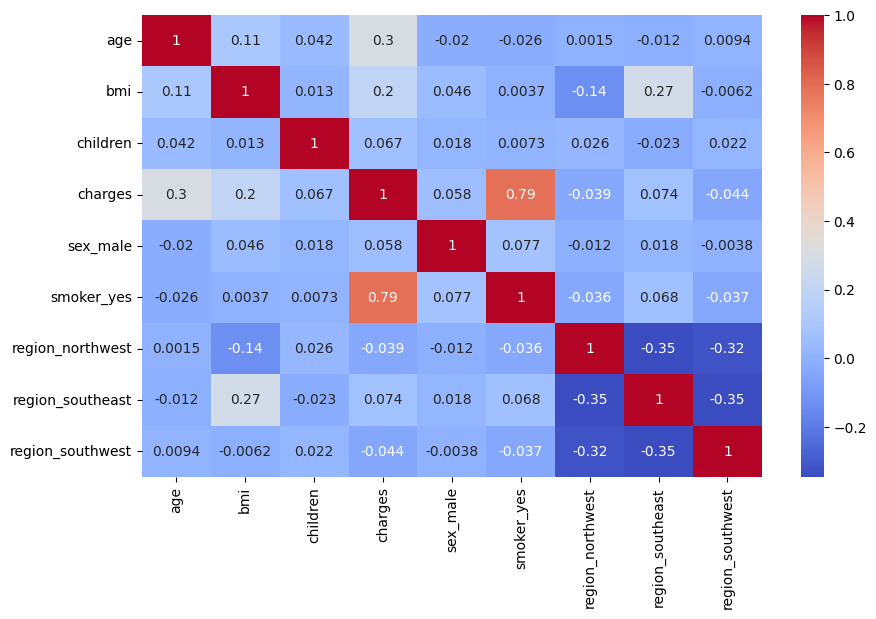

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')  # Correlation heatmap
plt.show()

In [29]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col} unique values: {df[col].unique()}")

In [30]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded = encoder.fit_transform(df[categorical_cols])
categorical_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_cols))
df = df.drop(columns=categorical_cols).reset_index(drop=True)
df = pd.concat([df, categorical_df], axis=1)


In [31]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df)


In [33]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['charges'])  # 'charges' is the target variable
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
print(f"Training data shape: {X_train.shape}")



Training data shape: (1069, 8)


In [35]:
print(f"Test data shape: {X_test.shape}")

Test data shape: (268, 8)


In [36]:
print(f"Duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

Duplicate rows: 0


In [37]:
df.drop_duplicates(inplace=True)

In [38]:
print(f"Duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

Duplicate rows: 0


In [39]:
df.to_csv("cleaned_Medical_Cost_Personal_Datasets.csv", index=False)

In [40]:
print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!
